# Customer Churn Prediction  
**Author:** Vishnu Gupta  
**Date:** June 2025  
**GitHub:** [github.com/Vishg3](https://github.com/Vishg3)  

In this project, I build and evaluate machine learning models to predict whether a telecom customer will churn. I compare multiple models, perform hyperparameter tuning, use SMOTE for class imbalance, and interpret the final model using SHAP.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#average tenure is 32.3 with min as 0 and max as 72
#average monthly charges is 64.8 with min as 18.25 and mas as 118.75

In [10]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2270,4140-MUHUG,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,86.85,220.95,Yes
6239,0665-XHDJU,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Electronic check,99.40,7285.7,No
6424,6034-ZRYCV,Female,0,Yes,No,72,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,54.20,3937.45,Yes


In [11]:
df.SeniorCitizen.unique()

array([0, 1])

In [12]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df['SeniorCitizen'].value_counts(normalize=True)*100

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64

<Axes: xlabel='SeniorCitizen', ylabel='count'>

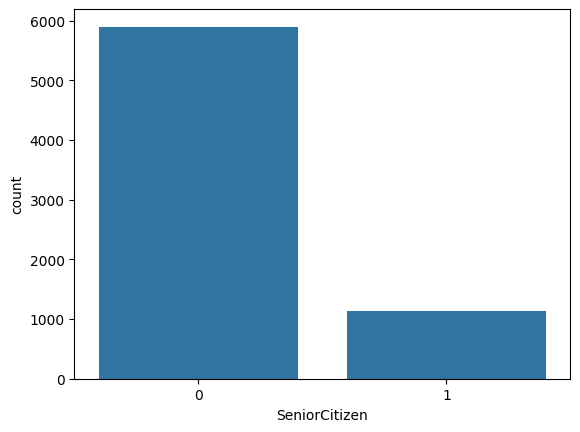

In [14]:
sns.countplot(data=df,x='SeniorCitizen')

In [15]:
#majority of customers are not senior citizens (83.8%)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
#no duplicated rows

In [18]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
58,3957-SQXML,Female,0,Yes,Yes,34,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.95,894.3,No
2722,4635-EJYPD,Male,0,Yes,Yes,32,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,No
4973,7852-LECYP,Male,1,Yes,No,13,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,No,Credit card (automatic),93.80,1261,No
4754,2072-ZVJJX,Male,0,Yes,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.25,1728.2,No


In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df.drop('customerID',axis=1,inplace=True)

In [22]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [23]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [25]:
df.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [26]:
df.TotalCharges.nunique()

6531

In [27]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [28]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [29]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [30]:
df.TotalCharges=df.TotalCharges.astype(float)

In [31]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [32]:
df['TotalCharges'].dtype

dtype('float64')

<Axes: xlabel='TotalCharges', ylabel='Count'>

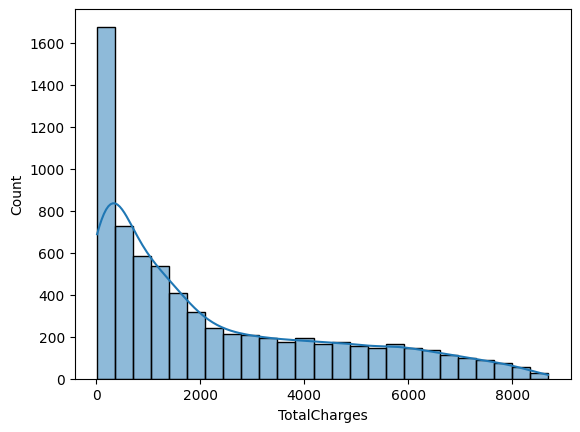

In [33]:
sns.histplot(df['TotalCharges'],kde=True)

<Axes: ylabel='TotalCharges'>

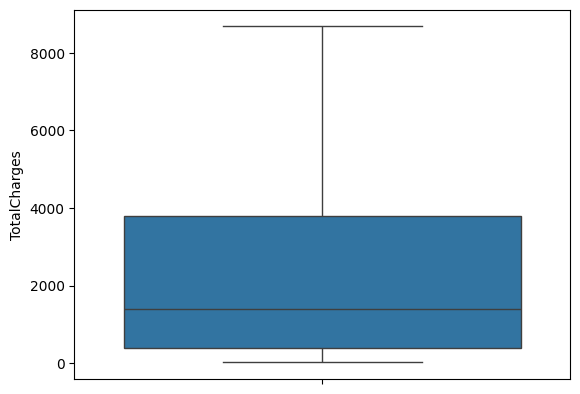

In [34]:
sns.boxplot(df['TotalCharges'])

In [35]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [160]:
#filled missing values in TotalCharges column with its mean as there are no outliers and very small percentage are missing values

In [37]:
df['TotalCharges'].isnull().sum()

np.int64(0)

<Axes: xlabel='TotalCharges', ylabel='Count'>

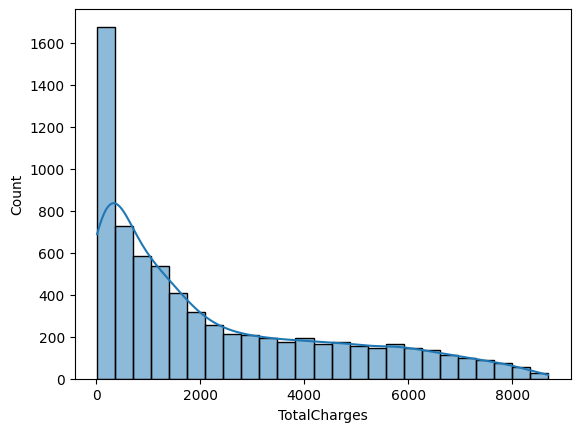

In [38]:
sns.histplot(df['TotalCharges'],kde=True)

In [39]:
#column distribution same before and after missing value treatment

In [40]:
catcols=[col for col in df.columns if df[col].dtype=="object"]
numcols=[col for col in df.columns if df[col].dtype!="object"]

In [41]:
catcols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [42]:
numcols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [43]:
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
961,Male,0,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.50,365.80,No
279,Female,0,No,No,5,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),50.55,244.75,No


In [44]:
df.Contract.nunique()

3

In [45]:
df.PaymentMethod.nunique()

4

In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [47]:
encoder=LabelEncoder()
scaler=StandardScaler()

In [48]:
df['Churn']=encoder.fit_transform(df['Churn'])

In [49]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6949,Male,0,Yes,Yes,32,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,Yes,Mailed check,36.25,1151.05,0
6497,Male,0,No,No,52,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.05,5364.80,0
2180,Male,1,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),95.50,6707.15,0
1211,Female,0,Yes,Yes,11,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,66.35,740.80,1


In [50]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [51]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [52]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [54]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6911,Female,0,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.10,1087.70
6566,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.55,8152.30
1230,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Electronic check,87.20,4017.45
4192,Male,0,No,No,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.15,405.60
4940,Male,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.45,1261.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,Male,0,Yes,Yes,69,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),59.75,4069.90
3325,Male,0,No,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.65,338.90
1414,Male,0,No,No,35,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,No,Month-to-month,No,Electronic check,95.50,3418.20
5787,Female,0,No,No,36,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,87.55,3078.10


In [55]:
y_train

6911    0
6566    0
1230    0
4192    0
4940    0
       ..
3714    0
3325    1
1414    0
5787    1
5963    0
Name: Churn, Length: 5634, dtype: int64

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [57]:
num_pipeline=Pipeline(steps=[('scale',StandardScaler())])
cat_pipeline=Pipeline(steps=[('encode',OrdinalEncoder())])

In [58]:
cat_cols=[col for col in X_train.columns if df[col].dtype=='object']
num_cols=[col for col in X_train.columns if df[col].dtype!='object']

In [59]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [60]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [61]:
type(num_cols)

list

In [62]:
del num_cols[0]

In [63]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [64]:
preprocessor=ColumnTransformer([('num_pipeline',num_pipeline,num_cols),('cat_pipeline',cat_pipeline,cat_cols)])

In [65]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [66]:
#encoded categorical columns and scaled numeric columns using pipeline and column transformer
#after train test split to prevent data leakage

In [67]:
X_train

array([[ 1.00542095, -1.48977954, -0.52886495, ...,  2.        ,
         1.        ,  0.        ],
       [ 1.53452448,  1.71818147,  2.59666411, ...,  2.        ,
         1.        ,  1.        ],
       [ 0.59841824,  0.74199012,  0.76731867, ...,  0.        ,
         0.        ,  2.        ],
       ...,
       [ 0.11001499,  1.01805104,  0.50219774, ...,  0.        ,
         0.        ,  2.        ],
       [ 0.15071526,  0.75363124,  0.35173028, ...,  0.        ,
         1.        ,  2.        ],
       [-0.41908854,  0.4576141 , -0.27400819, ...,  1.        ,
         1.        ,  3.        ]], shape=(5634, 18))

In [68]:
X_test

array([[-0.41908854, -0.82623551, -0.62066735, ...,  0.        ,
         0.        ,  3.        ],
       [-0.17488691,  1.35730664,  0.30810755, ...,  0.        ,
         1.        ,  2.        ],
       [-0.0527861 , -0.35061247, -0.28141875, ...,  0.        ,
         0.        ,  3.        ],
       ...,
       [-1.27379423,  0.17323809, -0.97907279, ...,  0.        ,
         0.        ,  2.        ],
       [ 1.33102312, -1.51472481, -0.42611261, ...,  2.        ,
         0.        ,  0.        ],
       [-1.07029288,  0.81183686, -0.75454402, ...,  0.        ,
         0.        ,  2.        ]], shape=(1409, 18))

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smote=SMOTE(random_state=27)

In [71]:
X_train_balanced,y_train_balanced=smote.fit_resample(X_train,y_train)

In [72]:
X_train_balanced

array([[ 1.00542095, -1.48977954, -0.52886495, ...,  2.        ,
         1.        ,  0.        ],
       [ 1.53452448,  1.71818147,  2.59666411, ...,  2.        ,
         1.        ,  1.        ],
       [ 0.59841824,  0.74199012,  0.76731867, ...,  0.        ,
         0.        ,  2.        ],
       ...,
       [ 0.78739395,  0.09920997,  0.48287131, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.50177123,  1.03592717,  0.94389263, ...,  0.        ,
         1.        ,  2.        ],
       [-0.73320358,  0.07017702, -0.53387421, ...,  0.        ,
         1.        ,  2.        ]], shape=(8262, 18))

In [73]:
y_train_balanced

0       0
1       0
2       0
3       0
4       0
       ..
8257    1
8258    1
8259    1
8260    1
8261    1
Name: Churn, Length: 8262, dtype: int64

In [74]:
y_train.value_counts(normalize=True)*100

Churn
0    73.322684
1    26.677316
Name: proportion, dtype: float64

In [75]:
y_train_balanced.value_counts(normalize=True)*100

Churn
0    50.0
1    50.0
Name: proportion, dtype: float64

In [161]:
#SMOTE was applied to balance the training set after encoding and scaling. The test set was kept imbalanced to reflect real-world data.
#also prevents high accuracy just by predicting 'no churn' all the time 

In [77]:
#Logistic regression

In [78]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [79]:
lr.fit(X_train_balanced,y_train_balanced)

LogisticRegression()

In [80]:
y_pred_lr=lr.predict(X_test)

In [81]:
y_pred_lr

array([0, 1, 0, ..., 1, 0, 1], shape=(1409,))

In [82]:
#Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [84]:
rfc.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier()

In [85]:
y_pred_rfc=rfc.predict(X_test)

In [86]:
y_pred_rfc

array([0, 1, 0, ..., 1, 0, 1], shape=(1409,))

In [87]:
#XGBoost

In [88]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [89]:
xgb.fit(X_train_balanced,y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [92]:
y_pred_xgb=xgb.predict(X_test)

In [93]:
y_pred_xgb

array([0, 1, 0, ..., 1, 0, 1], shape=(1409,))

In [91]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [102]:
print(f"Logistic Regression accuracy : {accuracy_score(y_test,y_pred_lr)}")
print(f"Random Forest accuracy : {accuracy_score(y_test,y_pred_rfc)}")
print(f"XGBoost accuracy : {accuracy_score(y_test,y_pred_xgb)}")

Logistic Regression accuracy : 0.7423704755145494
Random Forest accuracy : 0.7771469127040455
XGBoost accuracy : 0.7821149751596878


In [101]:
print("Logistic Regression classification report :")
print(classification_report(y_test,y_pred_lr))

Logistic Regression classification report :
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1043
           1       0.50      0.77      0.61       366

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [103]:
print("Random Forest classification report :")
print(classification_report(y_test,y_pred_rfc))

Random Forest classification report :
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1043
           1       0.57      0.57      0.57       366

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [104]:
print("XGBoost classification report :")
print(classification_report(y_test,y_pred_xgb))

XGBoost classification report :
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1043
           1       0.58      0.59      0.58       366

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [105]:
print("Logistic Regression confusion matrix :")
print(confusion_matrix(y_test,y_pred_lr))

Logistic Regression confusion matrix :
[[764 279]
 [ 84 282]]


In [106]:
print("Random Forest confusion matrix :")
print(confusion_matrix(y_test,y_pred_rfc))

Random Forest confusion matrix :
[[886 157]
 [157 209]]


In [107]:
print("XGBoost confusion matrix :")
print(confusion_matrix(y_test,y_pred_xgb))

XGBoost confusion matrix :
[[887 156]
 [151 215]]


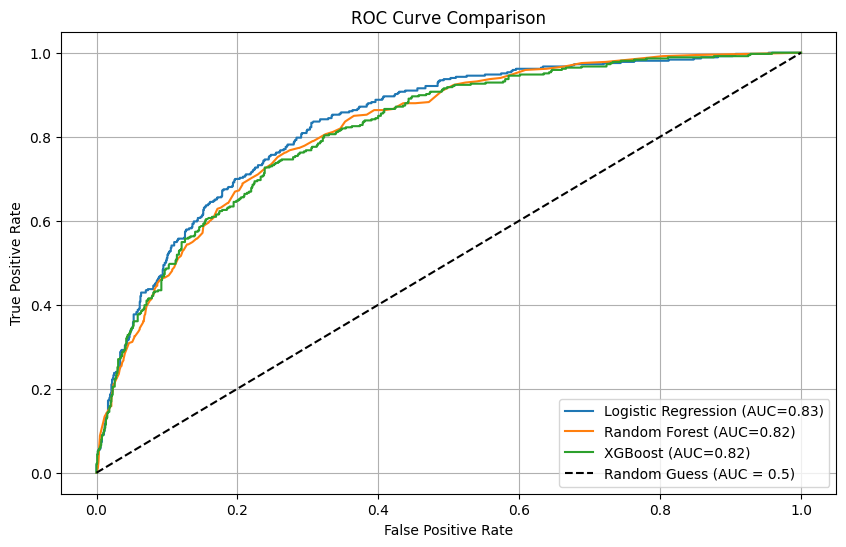

In [108]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

models={
    'Logistic Regression':lr,
    'Random Forest':rfc,
    'XGBoost':xgb
}

plt.figure(figsize=(10,6))

for name,model in models.items():
    y_proba=model.predict_proba(X_test)[:,1]  # Get probabilities for class 1
    fpr,tpr,_=roc_curve(y_test,y_proba)
    auc=roc_auc_score(y_test,y_proba)
    plt.plot(fpr,tpr,label=f'{name} (AUC={auc:.2f})')

plt.plot([0, 1],[0, 1],'k--',label='Random Guess (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [109]:
results={
    "Model":["Logistic Regression","Random Forest","XGBoost"],
    "Accuracy":[0.742,0.777,0.782],
    "F1-score (Macro Avg)":[0.71,0.71,0.72],
    "F1-score (Weighted Avg)":[0.76,0.78,0.78],
    "AUC":[0.83,0.82,0.82]
}

df_results=pd.DataFrame(results)
df_results

,Model,Accuracy,F1-score (Macro Avg),F1-score (Weighted Avg),AUC
0,Logistic Regression,0.742,0.71,0.76,0.83
1,Random Forest,0.777,0.71,0.78,0.82
2,XGBoost,0.782,0.72,0.78,0.82


### Why I Chose F1-score

I used **F1-score** as the primary evaluation metric because it balances both **precision** and **recall**, which is important for detecting churners while minimizing false alarms. Since both missing a churner (low recall) and wrongly flagging a non-churner (low precision) can be costly, F1-score provides a fair trade-off between the two.

---

### Model Selection and Justification

I trained three models — Logistic Regression, Random Forest, and XGBoost — and evaluated them using accuracy, AUC, and both macro and weighted F1-scores.

Although Logistic Regression had the highest AUC (0.83), **XGBoost** gave the best **macro-average F1-score (0.72)** and the **highest accuracy (0.782)**.

Since I applied SMOTE only to the training set and kept the test set imbalanced (to reflect real-world data), I reported both macro and weighted F1-scores:
- **Macro F1** reflects class-wise fairness
- **Weighted F1** reflects realistic performance based on actual class distribution

Based on this, I selected **XGBoost** as the final model for customer churn prediction because of its consistent and balanced performance across all key metrics.

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
params={
    "eta":[0.1,0.3,0.7],
    "gamma":[0,1],
    "max_depth":[2,4,6],
    "lambda":[0,1],
    "alpha":[0,1]
}

In [113]:
grid=GridSearchCV(estimator=XGBClassifier(),param_grid=params,cv=5,verbose=2)

In [114]:
grid.fit(X_train_balanced,y_train_balanced)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=2; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=2; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=2; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=2; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=2; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=4; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=4; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=4; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=4; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=4; total time=   0.1s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0, max_depth=6; total time=   0.2s
[CV] END ...alpha=0, eta=0.1, gamma=0, lambda=0

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'alpha': [0, 1], 'eta': [0.1, 0.3, 0.7],
                         'gamma': [0, 1], 'lambda': [0, 1],
                         'max_depth': [2, 4, 6]},
             verbose=2)

In [115]:
grid.best_params_

{'alpha': 0, 'eta': 0.1, 'gamma': 0, 'lambda': 0, 'max_depth': 6}

In [116]:
model=grid.best_estimator_

In [117]:
y_pred_model=model.predict(X_test)

In [118]:
y_pred_model

array([0, 1, 0, ..., 1, 0, 1], shape=(1409,))

In [119]:
print(f"Model accuracy : {accuracy_score(y_test,y_pred_model)}")

Model accuracy : 0.7792760823278921


In [120]:
print("Model classification report :")
print(classification_report(y_test,y_pred_model))

Model classification report :
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1043
           1       0.57      0.61      0.59       366

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [121]:
print("Model confusion matrix :")
print(confusion_matrix(y_test,y_pred_model))

Model confusion matrix :
[[874 169]
 [142 224]]


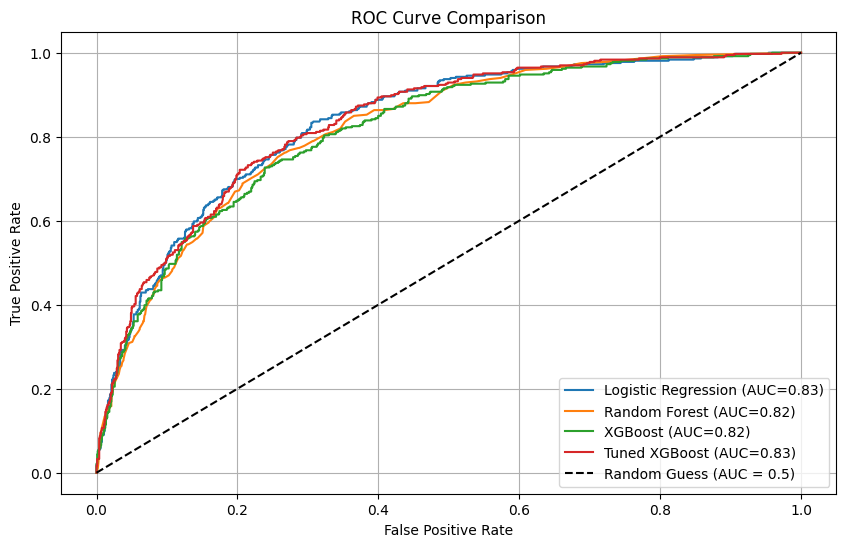

In [122]:
models={
    'Logistic Regression':lr,
    'Random Forest':rfc,
    'XGBoost':xgb,
    'Tuned XGBoost':model
}

plt.figure(figsize=(10,6))

for name,model in models.items():
    y_proba=model.predict_proba(X_test)[:,1]  # Get probabilities for class 1
    fpr,tpr,_=roc_curve(y_test,y_proba)
    auc=roc_auc_score(y_test,y_proba)
    plt.plot(fpr,tpr,label=f'{name} (AUC={auc:.2f})')

plt.plot([0, 1],[0, 1],'k--',label='Random Guess (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Final Model Selection After Hyperparameter Tuning

I performed hyperparameter tuning on XGBoost using GridSearchCV. The tuned model improved AUC from 0.82 to 0.83 while keeping F1-score nearly the same. Accuracy dropped only slightly (from 0.782 to 0.779), which is acceptable since AUC is more important for distinguishing churners from non-churners. Therefore, I selected the **tuned XGBoost model** as the final version.

**AUC (Area Under the ROC Curve)** measures how well a model can distinguish between the positive and negative classes across all thresholds — higher AUC means better class separation.



In [134]:
feature_names=preprocessor.get_feature_names_out()
X_test=pd.DataFrame(X_test,columns=feature_names)

In [135]:
X_test

,num_pipeline__tenure,num_pipeline__MonthlyCharges,num_pipeline__TotalCharges,cat_pipeline__gender,cat_pipeline__Partner,cat_pipeline__Dependents,cat_pipeline__PhoneService,cat_pipeline__MultipleLines,cat_pipeline__InternetService,cat_pipeline__OnlineSecurity,cat_pipeline__OnlineBackup,cat_pipeline__DeviceProtection,cat_pipeline__TechSupport,cat_pipeline__StreamingTV,cat_pipeline__StreamingMovies,cat_pipeline__Contract,cat_pipeline__PaperlessBilling,cat_pipeline__PaymentMethod
0,-0.419089,-0.826236,-0.620667,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0
1,-0.174887,1.357307,0.308108,1.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0
2,-0.052786,-0.350612,-0.281419,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0
3,-0.622590,0.994769,-0.318184,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0
4,0.924020,0.038534,0.521620,0.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.459789,-1.506410,-0.837365,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0
1405,-0.052786,1.214287,0.380731,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0
1406,-1.273794,0.173238,-0.979073,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1407,1.331023,-1.514725,-0.426113,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0


In [136]:
X_test.columns

Index(['num_pipeline__tenure', 'num_pipeline__MonthlyCharges',
       'num_pipeline__TotalCharges', 'cat_pipeline__gender',
       'cat_pipeline__Partner', 'cat_pipeline__Dependents',
       'cat_pipeline__PhoneService', 'cat_pipeline__MultipleLines',
       'cat_pipeline__InternetService', 'cat_pipeline__OnlineSecurity',
       'cat_pipeline__OnlineBackup', 'cat_pipeline__DeviceProtection',
       'cat_pipeline__TechSupport', 'cat_pipeline__StreamingTV',
       'cat_pipeline__StreamingMovies', 'cat_pipeline__Contract',
       'cat_pipeline__PaperlessBilling', 'cat_pipeline__PaymentMethod'],
      dtype='object')

In [137]:
X_test.columns=[name.split('__')[-1] for name in X_test.columns]

In [138]:
X_test.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')

In [139]:
X_test

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.419089,-0.826236,-0.620667,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0
1,-0.174887,1.357307,0.308108,1.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0
2,-0.052786,-0.350612,-0.281419,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0
3,-0.622590,0.994769,-0.318184,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0
4,0.924020,0.038534,0.521620,0.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.459789,-1.506410,-0.837365,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0
1405,-0.052786,1.214287,0.380731,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0
1406,-1.273794,0.173238,-0.979073,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1407,1.331023,-1.514725,-0.426113,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0


In [140]:
import shap

explainer=shap.Explainer(model,X_test)
shap_values=explainer(X_test)

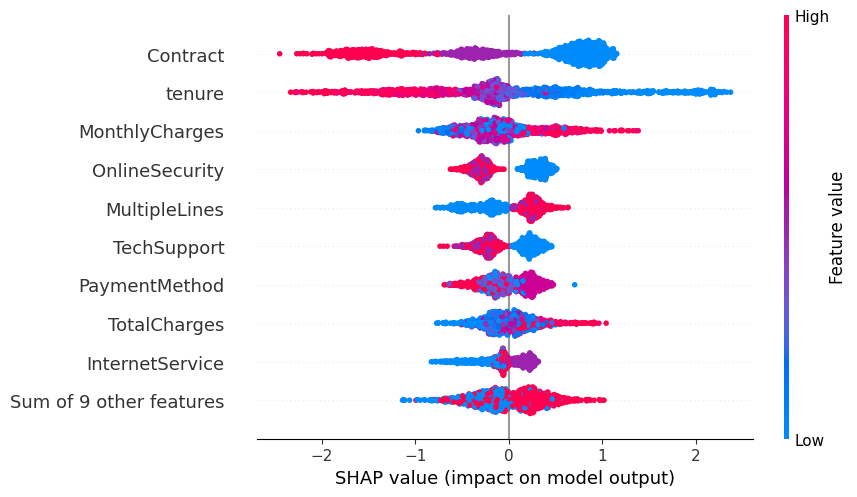

In [141]:
shap.plots.beeswarm(shap_values)

In [146]:
#high feature value is red and low is blue
#positive SHAP value is more likely to churn and negative SHAP value is more likely not to churn
#contract feature has more red on left side meaning customers with longer contracts are less likely to churn 

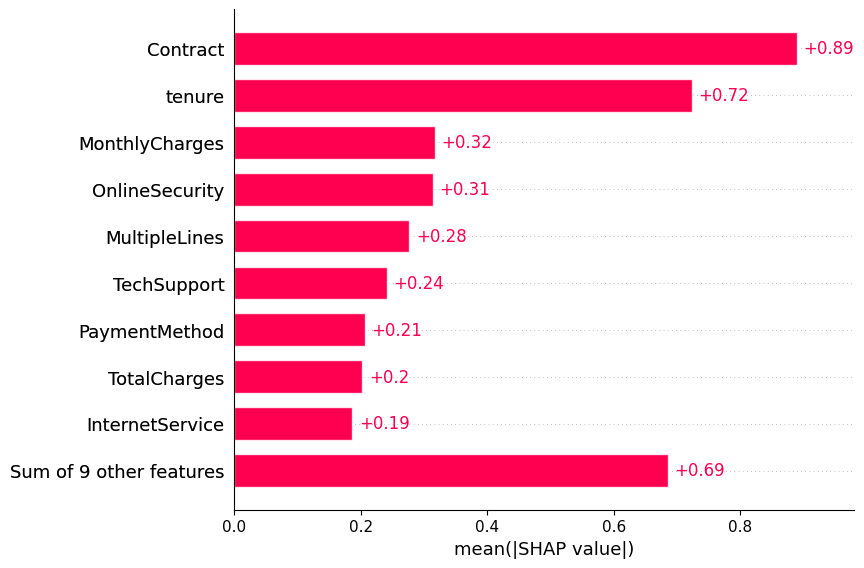

In [142]:
shap.plots.bar(shap_values)

In [145]:
#contract, tenure and monthly charges are the most influential features in predicting churn

In [143]:
shap.initjs()
shap.plots.force(shap_values[0])

In [147]:
#first row/customer --> shap_values[0]
#model predicts 'not churn' since output is below the base value
#contract is the strongest force pushing towards churn
#payment method is strongest force pushing towards not churn

### SHAP Interpretation Summary

SHAP analysis shows that **contract**, **tenure** and **monthly charges** are the most influential features in predicting churn. Customers on short-term contracts, with low tenure and high monthly charges are more likely to churn. Additionally, lack of services like online security and tech support also increases the likelihood of churn.

For individual predictions, SHAP's force plots help explain why a customer was predicted to churn, by showing which features pushed the prediction higher or lower.

In [148]:
import joblib

In [149]:
joblib.dump(model,'xgbmodel.joblib')

['xgbmodel.joblib']

In [150]:
loaded_model=joblib.load('xgbmodel.joblib')

In [169]:
def predict_churn(model,row):
    res=model.predict(row)[0]
    res=int(res)
    return ("Churn" if res==1 else "Not Churn")

In [170]:
predict_churn(loaded_model,X_test.iloc[[12]])

'Not Churn'